# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from config import api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Pulling the Cities
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lng_list = []
cities = []

# Generate Latitudes
lat = np.random.uniform(lat_range[0], lat_range[1],size= 1500)
lng = np.random.uniform(lng_range[0], lng_range[1],size= 1500)
lat_lng_list = zip(lat, lng)

for lat_lng in lat_lng_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + "London"
#result = requests.get(query_url).json()
#result

In [4]:
data= []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q=" 
#print(query_url)
for city in cities:
    result = requests.get(query_url+city).json()
    counter = counter + 1
    #print(result)
    try:
        lat = result["coord"]["lat"]
        lng = result["coord"]["lon"]
        temp_max = result["main"]["temp_max"]
        humidity = result["main"]["humidity"]
        cloudiness = result["clouds"]["all"]
        wind_speed = result["wind"]["speed"]
        country = result["sys"]["country"]
        date = result["dt"]
        data.append([city, lat, lng, temp_max, humidity, cloudiness, wind_speed, country, date])
        print(f"{counter} {city}")
        #print(city)
        time.sleep(1)
        
    except:
        print("City not found")

1 albany
2 sisimiut
3 jamestown
4 butaritari
5 saint george
6 ola
7 new norfolk
City not found
9 nome
10 arraial do cabo
11 mataura
12 punta arenas
13 pleshanovo
14 udachnyy
15 petropavlovsk-kamchatskiy
16 aktau
17 norman wells
18 vaini
19 tuktoyaktuk
20 hobart
21 busselton
22 itarema
23 dikson
24 henties bay
25 campbell river
26 rikitea
27 hermanus
28 bonavista
City not found
30 puerto ayora
31 nanortalik
City not found
33 bellevue
34 port elizabeth
35 bengkulu
36 bredasdorp
37 dingle
38 arroyo
39 ushuaia
40 yairipok
41 kwakoa
42 tiksi
43 castro
44 hasaki
45 carnarvon
46 tuy hoa
47 qaanaaq
48 maldonado
49 ohafia
50 viedma
51 fairbanks
52 port alfred
53 faanui
54 sitka
55 kearney
56 progreso
57 pangoa
58 hailar
59 izhevskoye
60 saint-denis
61 san vicente
62 lagoa
63 aitape
64 mashhad
65 caravelas
66 maryville
67 hithadhoo
68 lompoc
69 kiyasovo
City not found
71 altea
72 port keats
73 pathein
74 kaitangata
75 georgetown
City not found
City not found
78 cabo san lucas
79 vardo
80 bemidji

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_df = pd.DataFrame(data, columns = ["City", "Latitude", "Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,57.99,82,100,3.62,US,1603240803
1,sisimiut,66.94,-53.67,32.97,91,100,25.28,GL,1603240946
2,jamestown,42.10,-79.24,48.00,93,90,8.05,US,1603240947
3,butaritari,3.07,172.79,82.09,76,91,11.68,KI,1603240948
4,saint george,37.10,-113.58,84.20,9,1,5.82,US,1603240778
...,...,...,...,...,...,...,...,...,...
545,banjar,-8.19,114.97,86.00,84,75,2.24,ID,1603241652
546,kizukuri,40.81,140.39,64.00,50,20,2.24,JP,1603241653
547,calama,-22.47,-68.93,64.40,10,0,16.11,CL,1603241654
548,bilibino,68.05,166.44,22.17,94,100,2.06,RU,1603241656


In [34]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.483764,15.085073,59.270673,74.425455,52.823636,7.608382,1.603241e+09
std,33.673734,90.629079,20.165141,20.242719,40.624046,5.310836,2.246520e+02
min,-54.800000,-175.200000,1.400000,8.000000,0.000000,0.180000,1.603240e+09
25%,-6.407500,-65.770000,42.850000,65.000000,1.250000,3.392500,1.603241e+09
50%,26.255000,20.925000,64.000000,79.000000,59.500000,6.275000,1.603241e+09
75%,48.927500,88.380000,76.467500,90.000000,93.750000,10.290000,1.603241e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,29.970000,1.603242e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
city_df["Humidity"]>100

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Name: Humidity, Length: 550, dtype: bool

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [36]:
#Export CSV file
city_df.to_csv("Output_Data/cities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

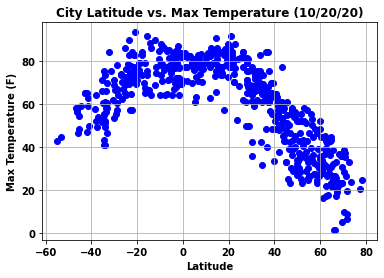

In [37]:
# Create the Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Max Temp"], facecolor= "blue")
plt.title("City Latitude vs. Max Temperature (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.savefig(Images/CityLatitudevsMaxTemperature.png)

The greatest concentration of highest temperature typically occurs around 0 (the Equator) and drops as you move away from it in either direction

## Latitude vs. Humidity Plot

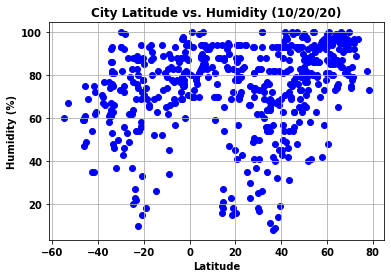

In [38]:
# Create the Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Humidity"], facecolor= "blue")
plt.title("City Latitude vs. Humidity (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.savefig(Images/CityLatitudevsHumidity.png)

Humidity seems to be lower in polar regions and increases as you move towards the souther hemisphere

## Latitude vs. Cloudiness Plot

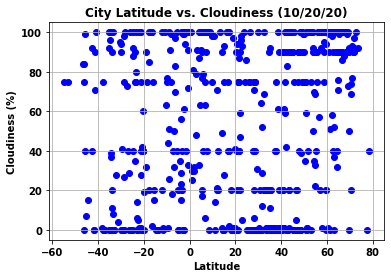

In [39]:
# Create the Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], facecolor= "blue")
plt.title("City Latitude vs. Cloudiness (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.savefig(Images/CityLatitudevsCloudiness.png)

Does not seem to be any effect on cloudiness as you move across the latitude

## Latitude vs. Wind Speed Plot

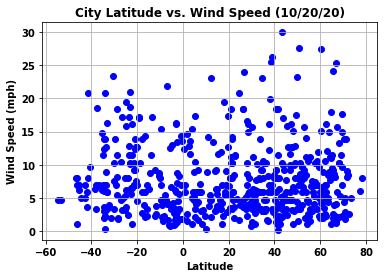

In [40]:
# Create the Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], facecolor= "blue")
plt.title("City Latitude vs. Wind Speed (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.savefig(Images/CityLatitudevsWindSpeed.png)

Does not seem to be any effect on wind speed as you move across the latitude

## Linear Regression

In [41]:
# Create a northern and southern hemisphere DataFrame
northern_hem = city_df.loc[city_df["Latitude"]>= 0]
southern_hem = city_df.loc[city_df["Latitude"]< 0]

In [42]:
def linear_regression(x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot (x, regress_values, "r-")
    return line_eq

# Annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


Text(0, 0.5, 'Max Temp (F)')

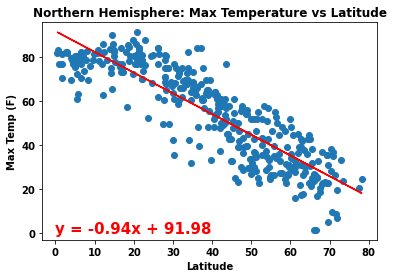

In [43]:
equation = linear_regression(northern_hem["Latitude"], northern_hem["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.savefig(Images/NorthernMaxTempvsLatitude.png)

There seems to be a strong negative correlation between max temperature and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.68


Text(0, 0.5, 'Max Temperature (F)')

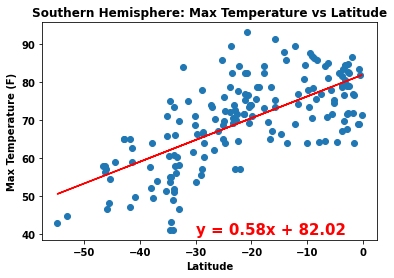

In [54]:
# Call the functions from above
equation = linear_regression(southern_hem["Latitude"], southern_hem["Max Temp"])
annotate(equation, -30,40)

# Plot it
plt.title("Southern Hemisphere: Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.savefig(Images/SouthernMaxTempvsLatitude.png)

There appears to be a strong correlation between max temperature and latitude in the sothern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25


Text(0, 0.5, 'Humidity')

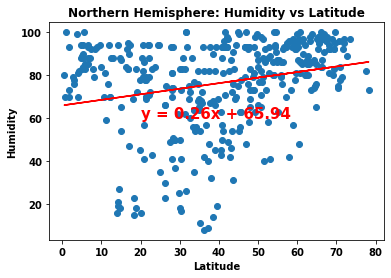

In [52]:
equation = linear_regression(northern_hem["Latitude"], northern_hem["Humidity"])
annotate(equation, 20, 60)

plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#plt.savefig(Images/NorthernHumidityvsLatitude.png)

There appears to be a moderate positive coorection between humidity and latitude in the northern hesmipshere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.68


Text(0, 0.5, 'Humidity (%)')

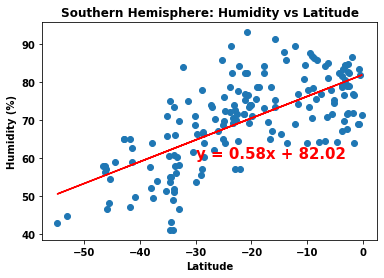

In [53]:
equation = linear_regression(southern_hem["Latitude"], southern_hem["Max Temp"])
annotate(equation, -30, 60)

plt.title("Southern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.savefig(Images/SouthernHumidityvsLatitude.png)

There appears to be a strong correlation between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25


Text(0, 0.5, 'Cloudiness (%)')

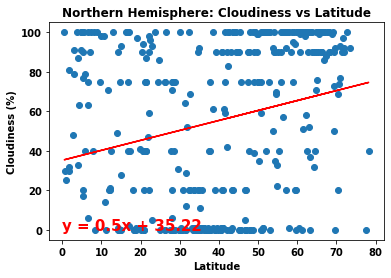

In [47]:
equation = linear_regression(northern_hem["Latitude"], northern_hem["Cloudiness"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.savefig(Images/NorthernCloudinessvsLatitude.png)

There appears to be a moderately positive corrlation between cloudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.68


Text(0, 0.5, 'Max Temp (F)')

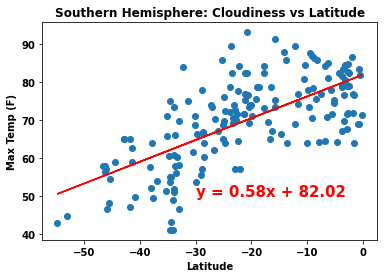

In [55]:
equation = linear_regression(southern_hem["Latitude"], southern_hem["Max Temp"])
annotate(equation, -30, 50)

plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#plt.savefig(Images/SouthernCloudinessvsLatitude.png)

There appears to be a strong correlation between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03


Text(0, 0.5, 'Wind Speed (mph)')

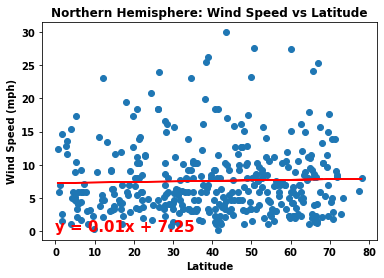

In [49]:
equation = linear_regression(northern_hem["Latitude"], northern_hem["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.savefig(Images/NorthernWindSpeedvsLatitude.png)

There is a weak positive correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.14


Text(0, 0.5, 'Wind Speed (mph)')

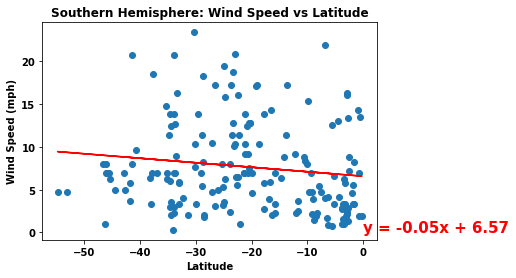

In [50]:
equation = linear_regression(southern_hem["Latitude"], southern_hem["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.savefig(Images/SouthernWindSpeedvsLatitude.png)

There is a negative correlation between wind speed and latitude in the southern hemisphere